# 🚗

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

In [30]:
data1 = pd.read_csv("../data/raw/Train.csv")
data2 = pd.read_csv("../data/raw/Test.csv")
rawdata = pd.concat([data1,data2],axis="rows")


In [31]:
rawdata.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [32]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


We have 10,695 total rows and 10 columns. 
`ID` and `Segmentation` are irrelevant for the analysis (for the exercise we decided to ignore the `Segmentation` information since it is our target)

In [33]:
ID = 'ID'
TARGET = 'Segmentation'

7 categorical features:
* Gender of the customer
* Marital status of the customer
* Is the customer a graduate?
* Profession of the customer
* Spending score of the customer (High, medium, low)
* Var_1: Anonymised category for the customer

In [34]:
CATEGORICAL = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

3 numerical features:
* Age of customer
* Work Experience in years
* Number of family members for the customer (including the customer)

In [35]:
NUMERICAL = ['Age', 'Work_Experience', 'Family_Size']

## Basic EDA of the categorical data

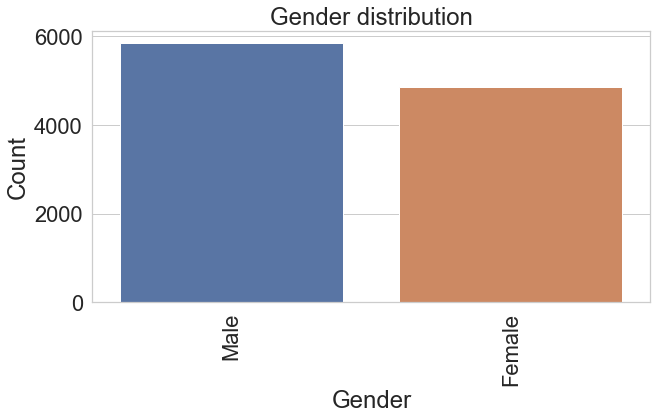

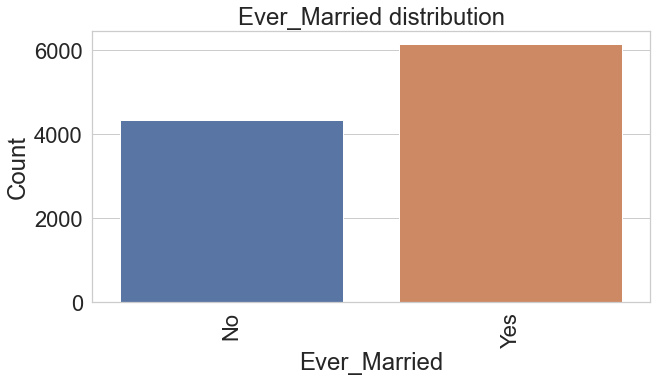

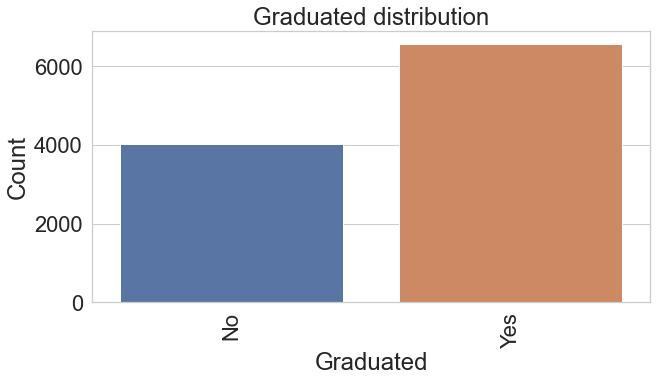

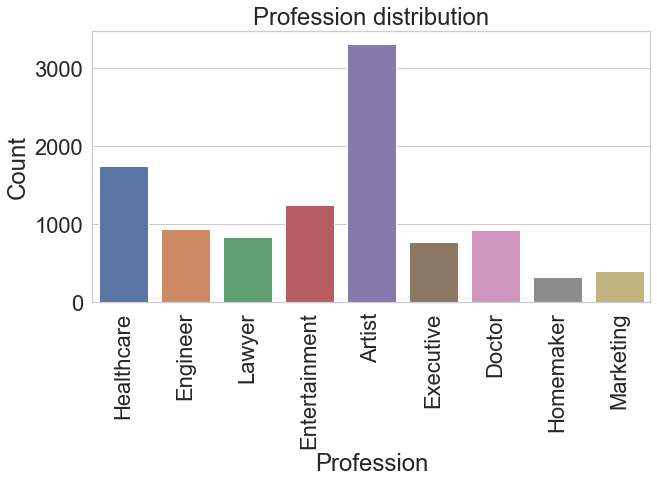

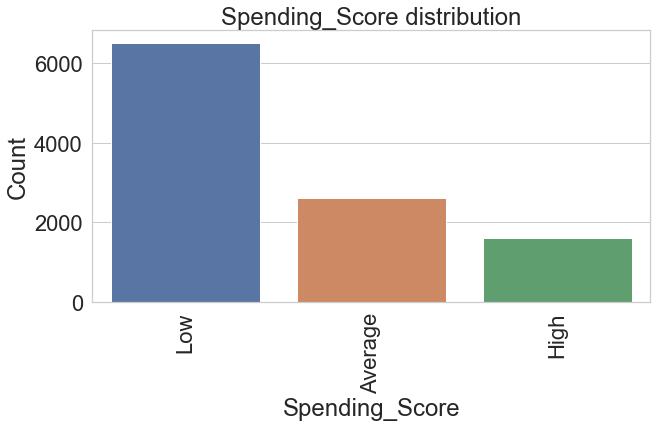

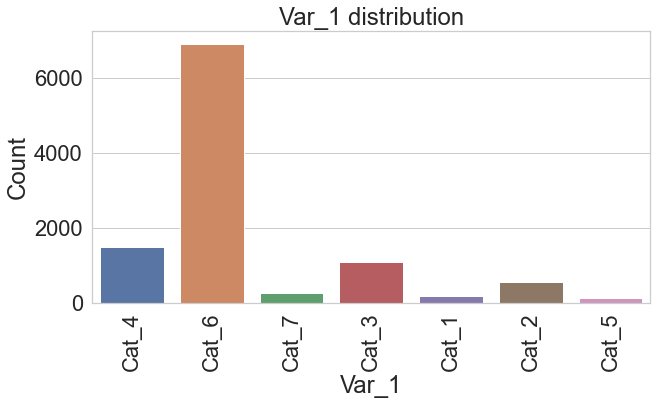

In [36]:
for feature in CATEGORICAL:
    fig, ax = plt.subplots(nrows=1,
                        ncols=1, figsize=(10, 5))
    sns.countplot(data=rawdata, x=feature, ax=ax)
    ax.set(title=f'{feature} distribution', ylabel='Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [37]:
NUMERICAL

['Age', 'Work_Experience', 'Family_Size']

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Family size distribution')]

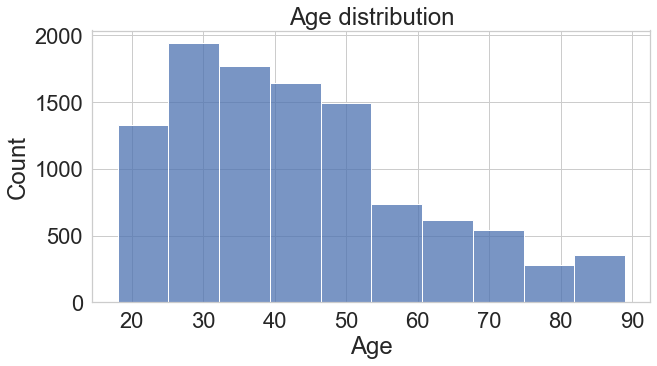

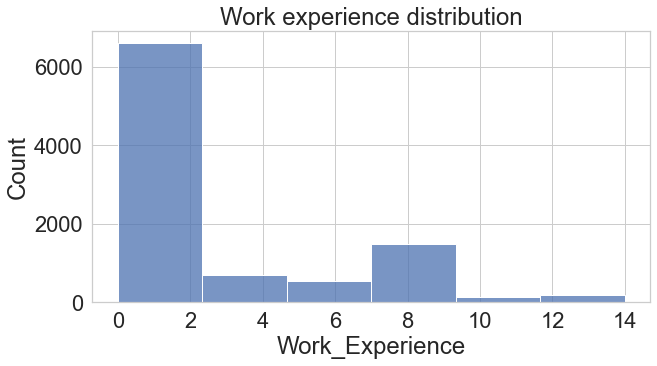

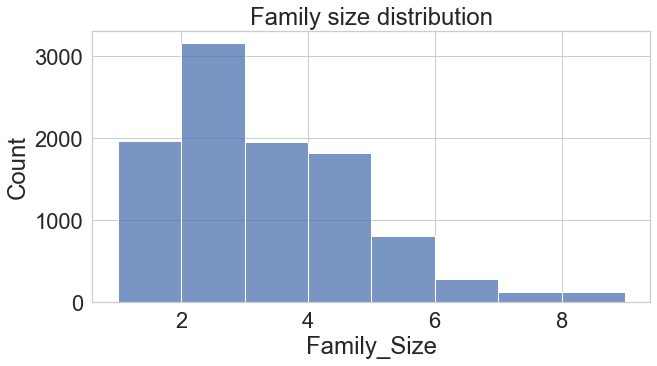

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=rawdata, x='Age', ax=ax,bins=10)
ax.set(title='Age distribution', ylabel='Count')

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=rawdata, x='Work_Experience', ax=ax, bins=6)
ax.set(title='Work experience distribution', ylabel='Count')

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=rawdata, x='Family_Size', ax=ax, bins=8)
ax.set(title='Family size distribution', ylabel='Count')


##  Missing values, Encoding and Scaling

In [39]:
len(rawdata)

10695

In [41]:
rawdata.drop_duplicates(inplace=True)
len(rawdata)


10657

There are `38` duplicates that we just removed

In [44]:
for feature in CATEGORICAL+NUMERICAL:
    print(
        f"In {feature} there are {rawdata[feature].isna().sum()} missing value over {len(rawdata)}")


In Gender there are 0 missing value over 10657
In Ever_Married there are 189 missing value over 10657
In Graduated there are 100 missing value over 10657
In Profession there are 162 missing value over 10657
In Spending_Score there are 0 missing value over 10657
In Var_1 there are 108 missing value over 10657
In Age there are 0 missing value over 10657
In Work_Experience there are 1090 missing value over 10657
In Family_Size there are 447 missing value over 10657


In [61]:
f"There are {round(100*rawdata.isna().values.sum()/len(rawdata),2)}% of rows with missing values"


'There are 19.67% of rows with missing values'

We fill the missing value of the categorical values with the most common value. At most 1-2% of rows are missing. 

In [72]:
for feature in CATEGORICAL:
    most_frequent = rawdata[feature].value_counts().idxmax(axis='rows')
    rawdata[feature].fillna(most_frequent, inplace=True)

We need to fill missing data for numerical feature. For `Family_Size` almost 5% of data is missing. For `Work_Experience` almost 10% is missing we decide to omitt this feature from the segmentation analysis

In [74]:
rawdata['Family_Size'].fillna(rawdata['Family_Size'].mean(), inplace=True)


In [107]:
SEGMENTATION_FEATURES= ['Gender', 'Ever_Married', 'Graduated', 'Profession',
           'Spending_Score', 'Var_1', 'Age', 'Family_Size']
cleaned_data = rawdata[SEGMENTATION_FEATURES].copy()


In [108]:
cleaned_data['Gender'] = cleaned_data['Gender'].map({'Male': 1, 'Female': 0})
cleaned_data['Ever_Married'] = cleaned_data['Ever_Married'].map(
    {'Yes': 1, 'No': 0})
cleaned_data['Graduated'] = cleaned_data['Graduated'].map(
    {'Yes': 1, 'No': 0})


In [109]:
#Spending Score
spedummy = pd.get_dummies(cleaned_data.Spending_Score, prefix="Spending_Score")
cleaned_data = pd.concat([cleaned_data, spedummy], axis='columns')
cleaned_data.drop('Spending_Score', axis='columns', inplace=True)


In [110]:
#Profession, Var_1 and Segmentation
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cleaned_data['Profession'] = labelencoder.fit_transform(cleaned_data['Profession'])
cleaned_data['Var_1'] = labelencoder.fit_transform(cleaned_data['Var_1'])



In [112]:
cleaned_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Gender,10657.0,0.546214,0.497883,0.0,0.0,1.000000,1.0,1.0
Ever_Married,10657.0,0.594351,0.491040,0.0,0.0,1.000000,1.0,1.0
Graduated,10657.0,0.624003,0.484402,0.0,0.0,1.000000,1.0,1.0
Profession,10657.0,2.757061,2.552453,0.0,0.0,3.000000,5.0,8.0
Var_1,10657.0,4.144975,1.416038,0.0,3.0,5.000000,5.0,6.0
Age,10657.0,43.537956,16.769600,18.0,30.0,41.000000,53.0,89.0
Family_Size,10657.0,2.843781,1.504181,1.0,2.0,2.843781,4.0,9.0
Spending_Score_Average,10657.0,0.243314,0.429103,0.0,0.0,0.000000,0.0,1.0
Spending_Score_High,10657.0,0.150042,0.357130,0.0,0.0,0.000000,0.0,1.0
Spending_Score_Low,10657.0,0.606644,0.488518,0.0,0.0,1.000000,1.0,1.0


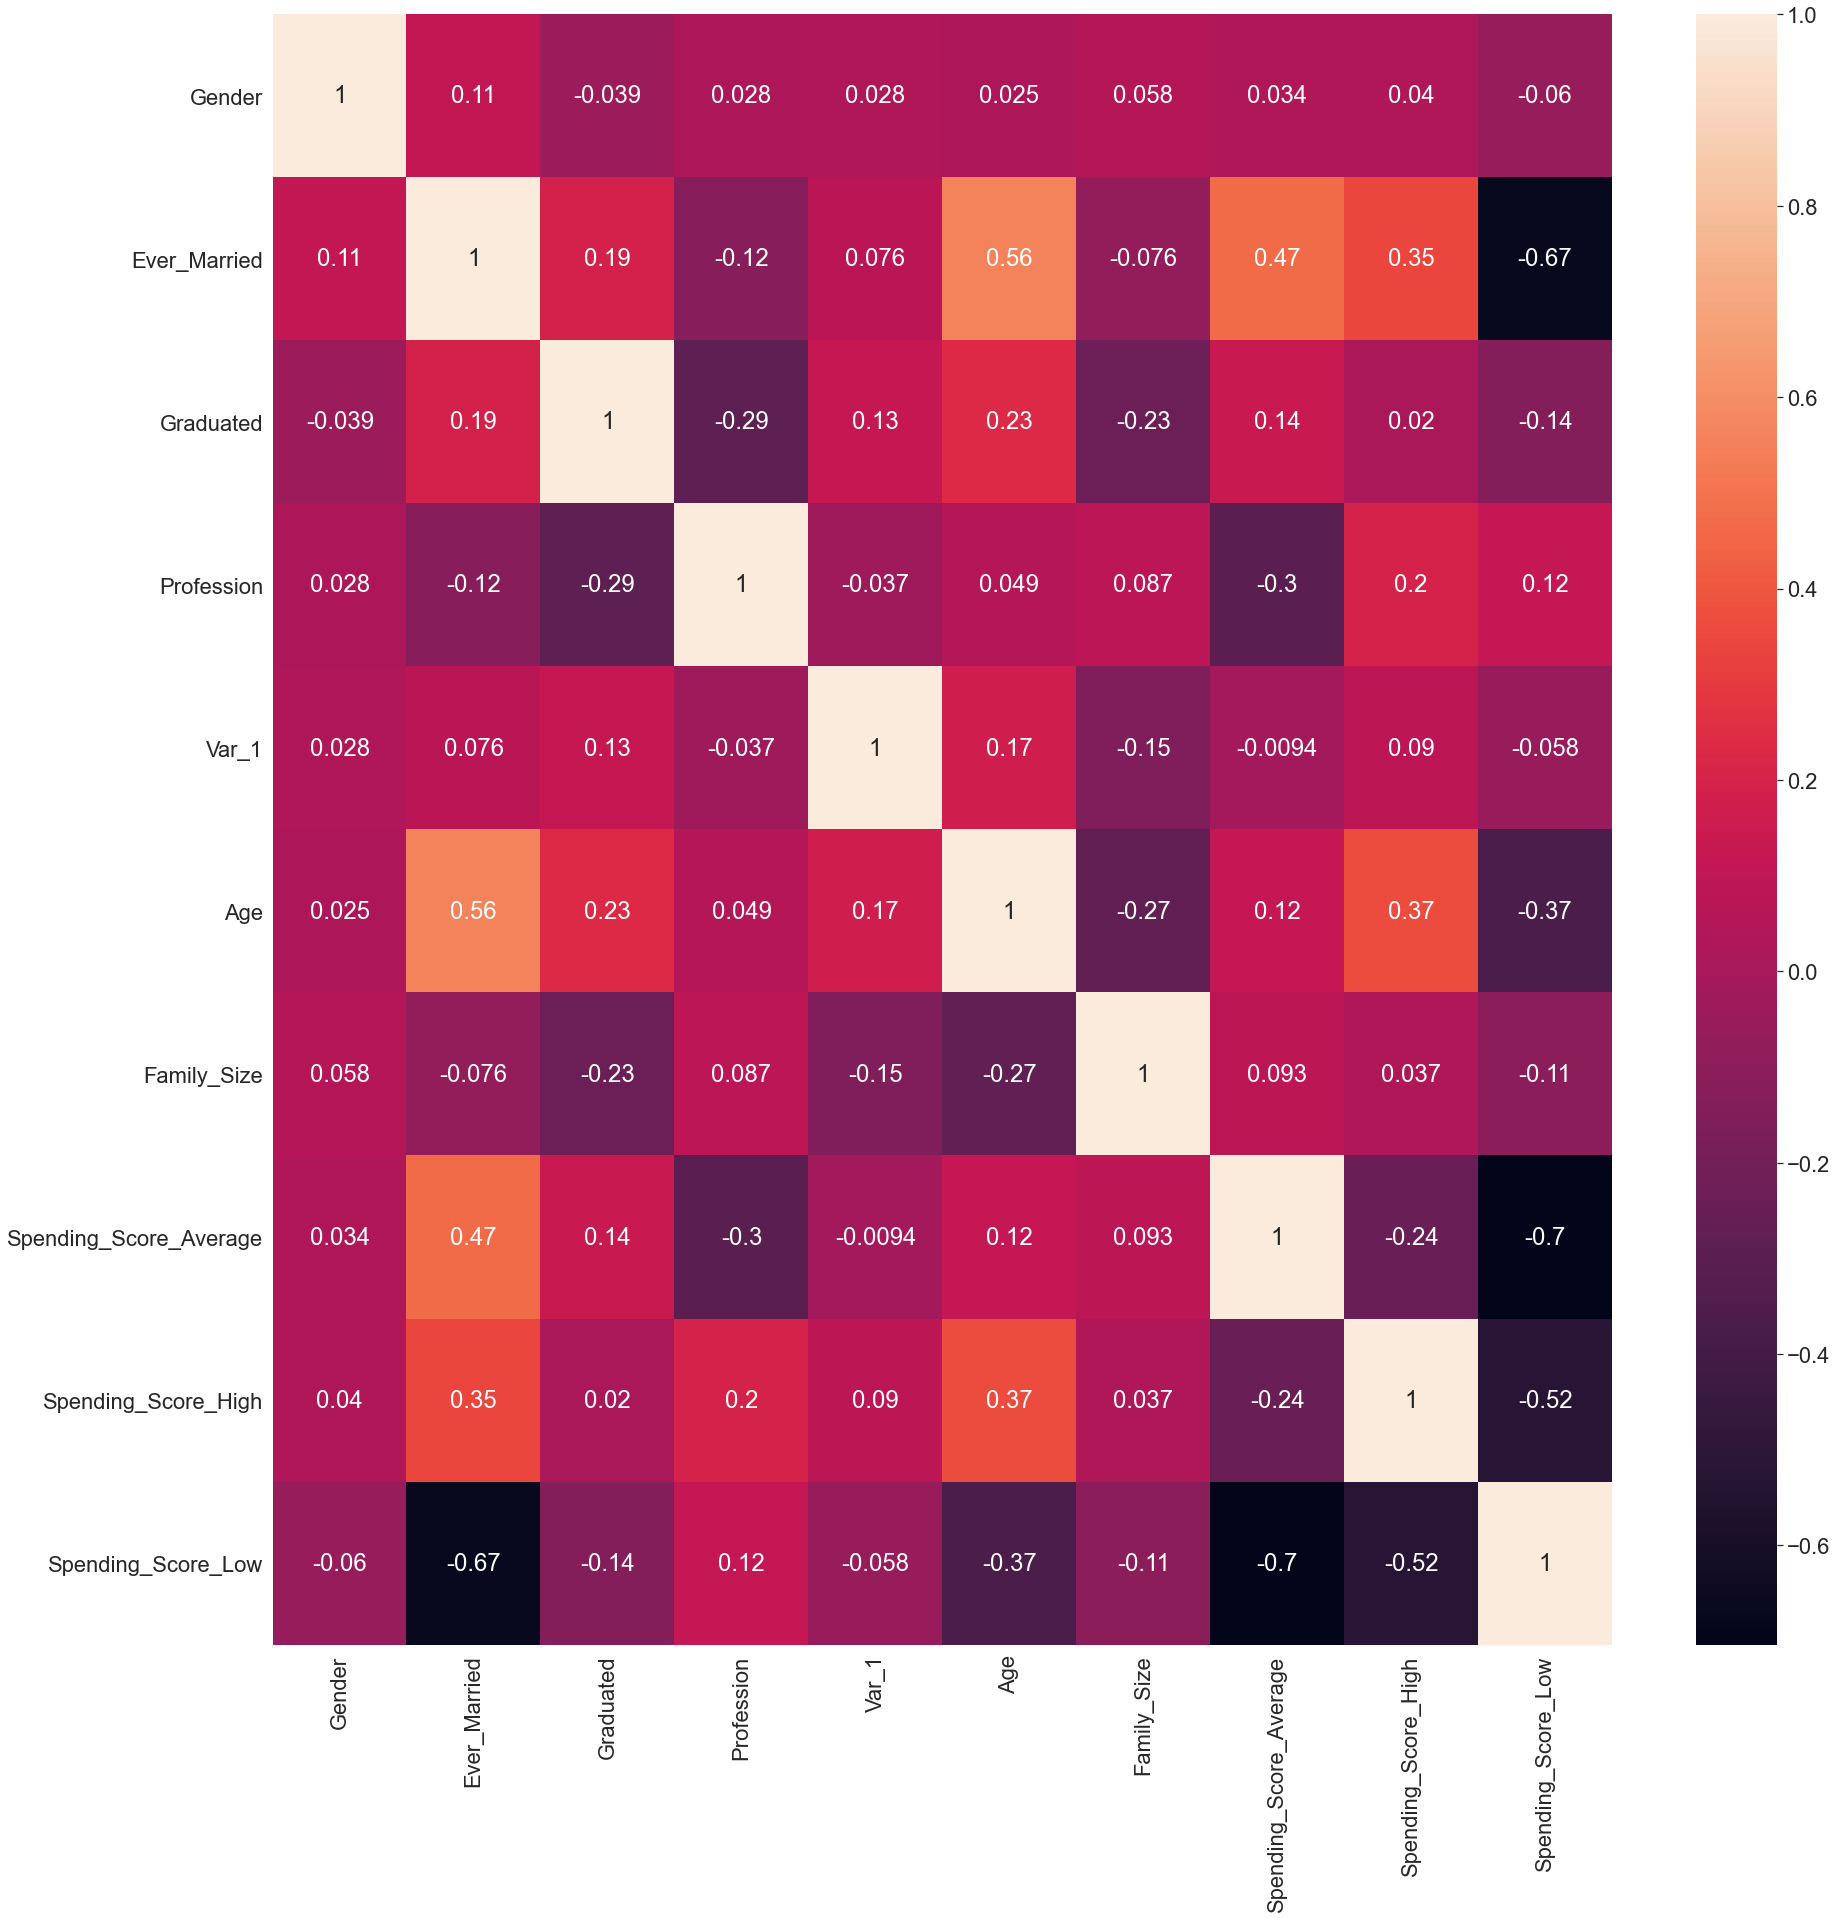

In [114]:
fig, axes = plt.subplots(figsize=(30, 30))
sns.heatmap(cleaned_data.corr(), annot=True)


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_data)

In [120]:
scaled_data=pd.DataFrame(scaled_data, columns=cleaned_data.columns)


In [125]:
from sklearn.cluster import KMeans

wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_data)
  wcss_1.append(kmeans.inertia_)


/home/pdona/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


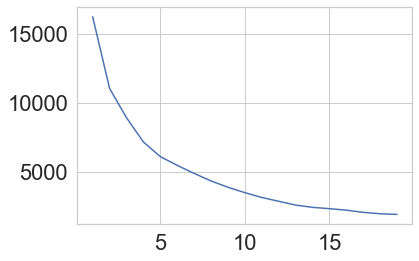

In [126]:
sns.lineplot(range_values,wcss_1)


In [127]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)


KMeans(n_clusters=5)